In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('./Real_Combine.csv')
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [4]:
df.shape

(1090, 9)

In [5]:
# checking null values in the data set
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1090 non-null   float64
 1   TM      1090 non-null   float64
 2   Tm      1090 non-null   float64
 3   SLP     1090 non-null   float64
 4   H       1090 non-null   float64
 5   VV      1090 non-null   float64
 6   V       1090 non-null   float64
 7   VM      1090 non-null   float64
 8   PM 2.5  1088 non-null   float64
dtypes: float64(9)
memory usage: 76.8 KB


In [7]:
#Dropping rows with null values
df=df.dropna()

In [8]:
df.shape

(1088, 9)

In [9]:
# Storing Dependant and Independent Features in X and Y.
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [10]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [11]:
y.head()

0    219.720833
1    182.187500
2    154.037500
3    223.208333
4    200.645833
Name: PM 2.5, dtype: float64

In [12]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.963416,0.957227,-0.883207,-0.488919,0.625547,0.320218,0.276548,-0.629693
TM,0.963416,1.000000,0.889979,-0.826008,-0.576799,0.598727,0.303218,0.285671,-0.565459
Tm,0.957227,0.889979,1.000000,-0.912333,-0.275047,0.547490,0.312165,0.244408,-0.661733
SLP,-0.883207,-0.826008,-0.912333,1.000000,0.231971,-0.483494,-0.325862,-0.269129,0.605637
H,-0.488919,-0.576799,-0.275047,0.231971,1.000000,-0.489597,-0.356241,-0.368694,0.166577
VV,0.625547,0.598727,0.547490,-0.483494,-0.489597,1.000000,0.369851,0.325963,-0.593327
V,0.320218,0.303218,0.312165,-0.325862,-0.356241,0.369851,1.000000,0.780952,-0.327917
VM,0.276548,0.285671,0.244408,-0.269129,-0.368694,0.325963,0.780952,1.000000,-0.262848
PM 2.5,-0.629693,-0.565459,-0.661733,0.605637,0.166577,-0.593327,-0.327917,-0.262848,1.000000


Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')


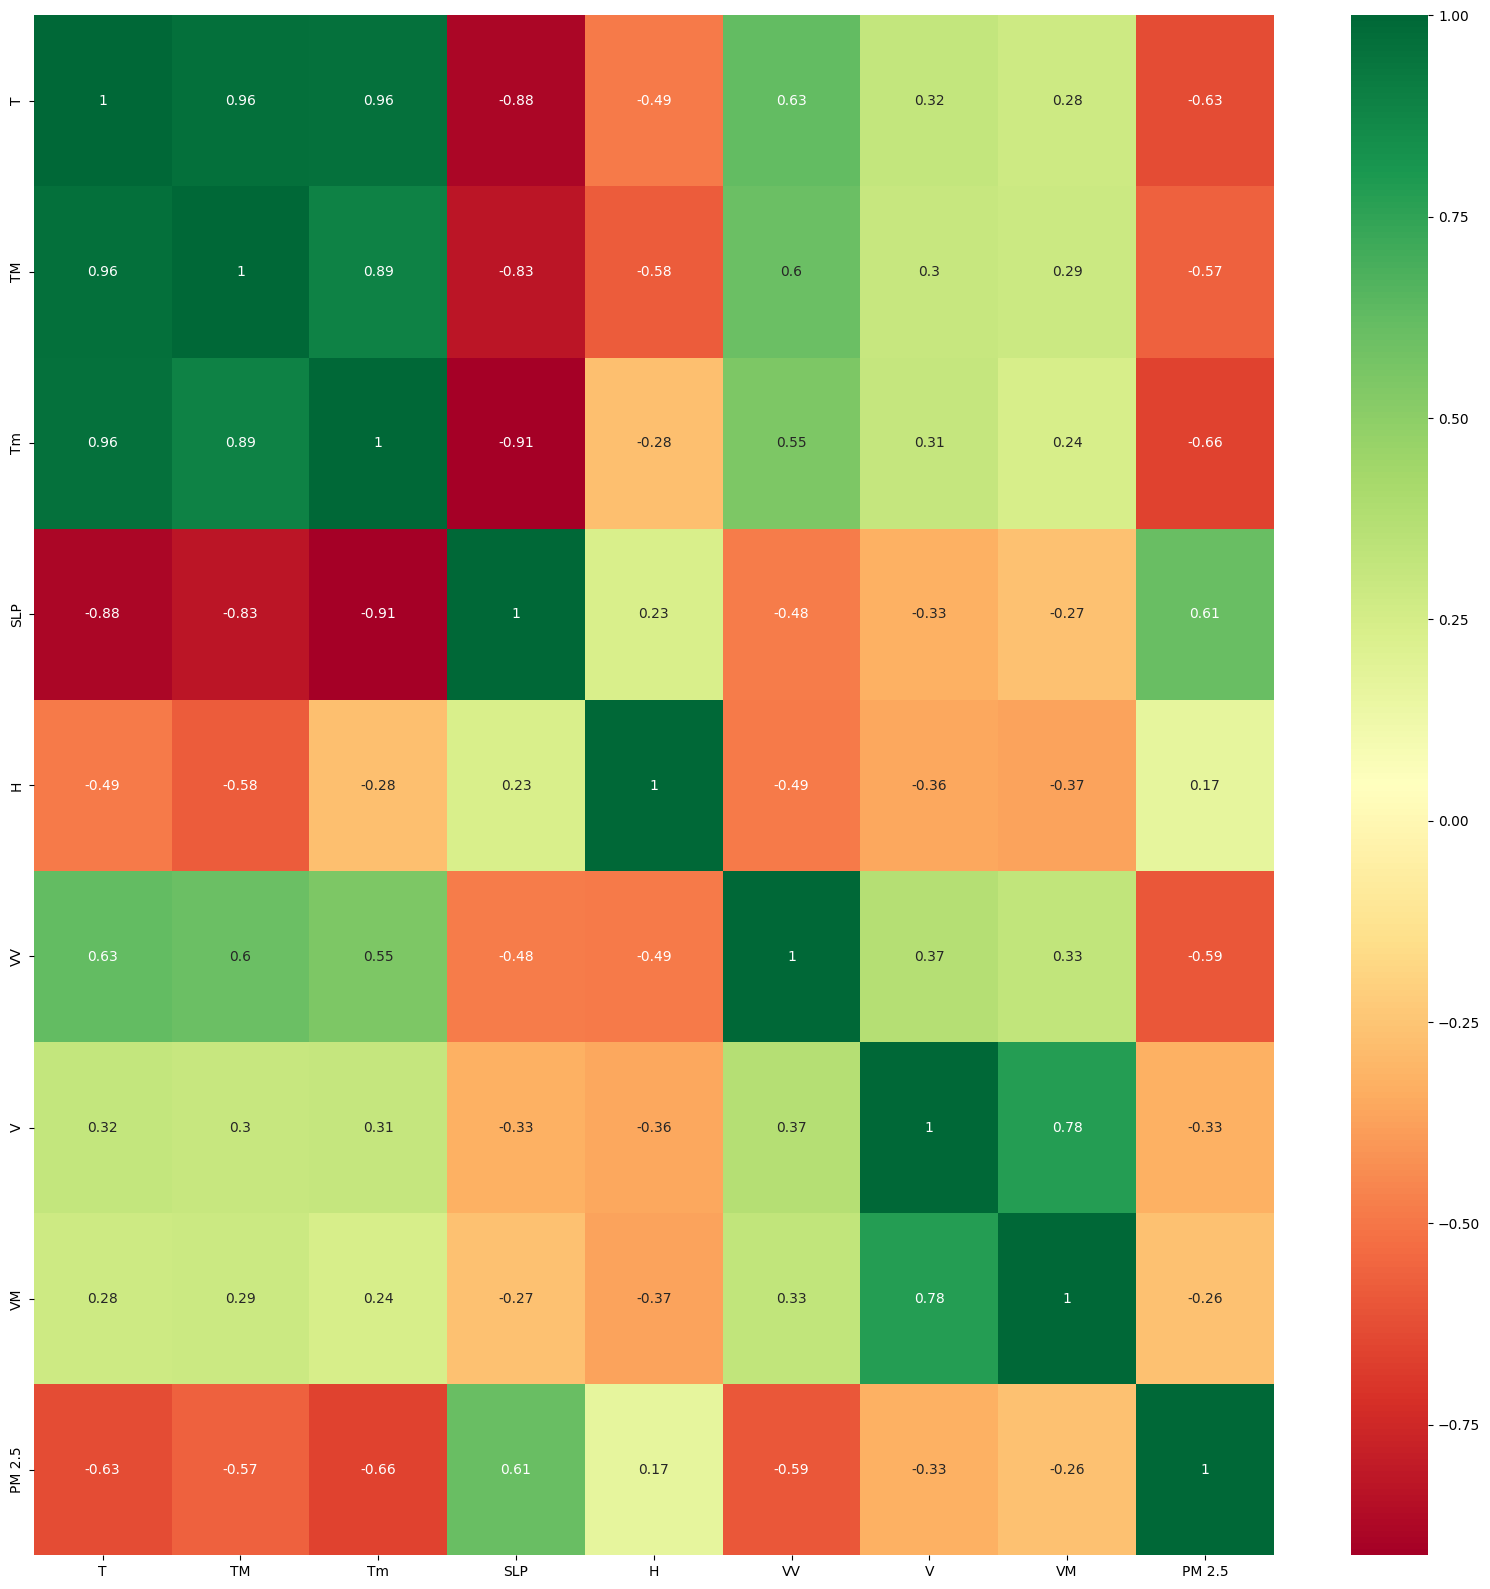

In [13]:

corrmat=df.corr()
top_corr_features=corrmat.index
print(top_corr_features)
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [14]:

model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [15]:
print(model.feature_importances_)

[0.18797019 0.07984984 0.20408293 0.14725304 0.0790709  0.1955814
 0.05831614 0.04787557]


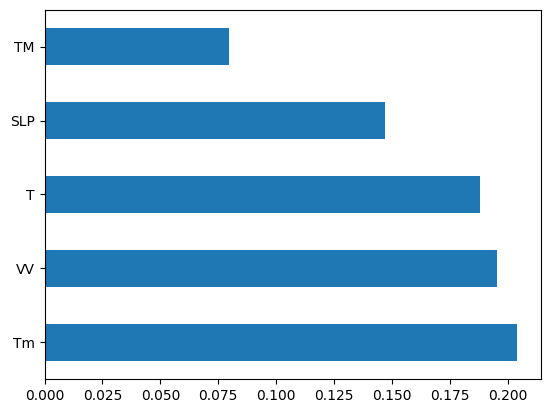

In [16]:
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

<Axes: xlabel='PM 2.5', ylabel='Count'>

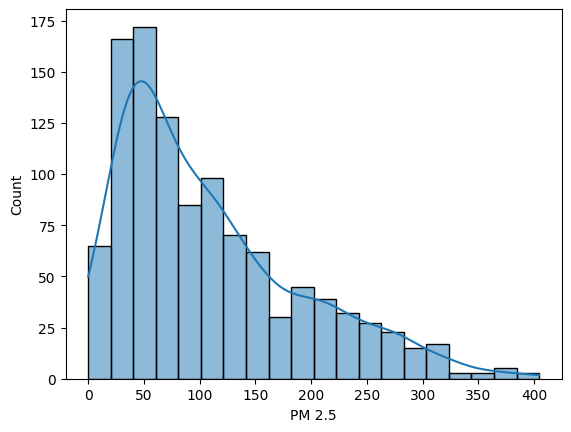

In [17]:
sns.histplot(y,kde=True)

# Train-Test Split

In [18]:

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)

# Linear Regression

In [19]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [20]:
print("Coefficient of determination R^2 <--on train set:{}".format(regressor.score(X_train,y_train)))

Coefficient of determination R^2 <--on train set:0.5558460401426302


In [21]:
print("Coefficient of determination R^2 <--on test set:{}".format(regressor.score(X_test,y_test)))

Coefficient of determination R^2 <--on test set:0.5002132050072754


In [22]:
regressor.score(X_train,y_train)

0.5558460401426302

In [23]:

score=cross_val_score(regressor,X,y,cv=5)
score

array([0.57167602, 0.53819461, 0.49430299, 0.43619185, 0.44066312])

In [24]:
score.mean()

0.496205718724026

### Model Evaluation

In [25]:
coeff_df=pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T,0.735866
TM,0.494222
Tm,-5.785464
SLP,0.530084
H,-0.734590
VV,-43.457359
V,-1.929977
VM,0.089839


In [26]:
regressor.coef_

array([  0.73586574,   0.49422152,  -5.78546447,   0.53008447,
        -0.7345896 , -43.45735865,  -1.92997688,   0.08983924])

This will print the value of the intercept, which represents the starting point of the regression line and provides a baseline prediction when all input features are zero. 

In [27]:
regressor.intercept_

-201.84687008590706

In [28]:
prediction=regressor.predict(X_test)

# Histogram of the residuals

<Axes: xlabel='PM 2.5', ylabel='Count'>

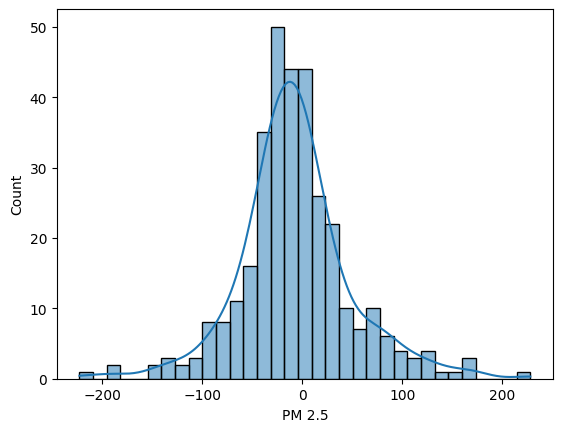

In [29]:
sns.histplot(y_test-prediction,kde=True)

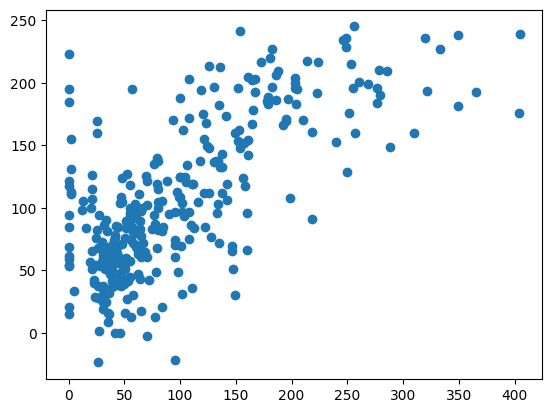

In [30]:
plt.scatter(y_test,prediction)

In [31]:
file=open('regression_model.pkl','wb')
pickle.dump(regressor,file)

# Linear Regression Score

In [32]:

print('MAE:',metrics.mean_absolute_error(y_test,prediction))
print('MSE:',metrics.mean_squared_error(y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 40.54246531132519
MSE: 3226.014432469145
RMSE: 56.79801433561868


# Lasso Regression

In [33]:
lasso=Lasso()
parameters={'alpha':[1,5,10,20,30, 35, 40, 50, 60, 70, 800]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=130)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-3206.3748711321937


### Model Evaluation

In [34]:
lasso_regressor.score(X_test,y_test)

-3162.998638967035

In [35]:
prediction=lasso_regressor.predict(X_test)

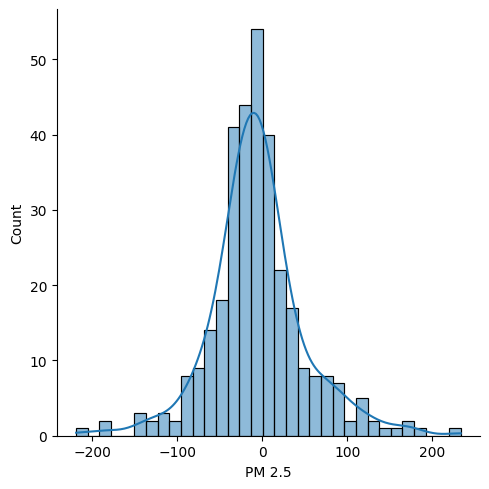

In [36]:
sns.displot(y_test-prediction,kde=True)

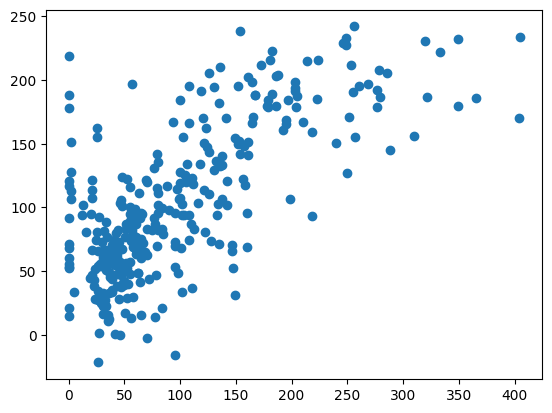

In [37]:
plt.scatter(y_test,prediction)

# Lasso Regression Score

In [38]:

print('MAE:',metrics.mean_absolute_error(y_test,prediction))
print('MSE:',metrics.mean_squared_error(y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 39.65014912069471
MSE: 3162.998638967035
RMSE: 56.24054266245157


# Random Forest Regressor

In [39]:
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [40]:
regressor.score(X_train,y_train)

0.944770212735633

In [41]:
print('Coefficient of determination R^2 <--- on train set:{}'.format(regressor.score(X_train,y_train)))

Coefficient of determination R^2 <--- on train set:0.944770212735633


In [42]:
print('Coefficient of determination R^2 <--- on test set:{}'.format(regressor.score(X_test,y_test)))

Coefficient of determination R^2 <--- on test set:0.568664620760615


In [43]:

score=cross_val_score(regressor,X_train,y_train,cv=10)
score

array([0.65791842, 0.64683656, 0.71341306, 0.56992935, 0.59455277,
       0.65605403, 0.62326498, 0.56845666, 0.42837604, 0.5643949 ])

In [44]:
score.mean()

0.6023196755156457

### Model Evaluation

In [45]:
prediction=regressor.predict(X_test)

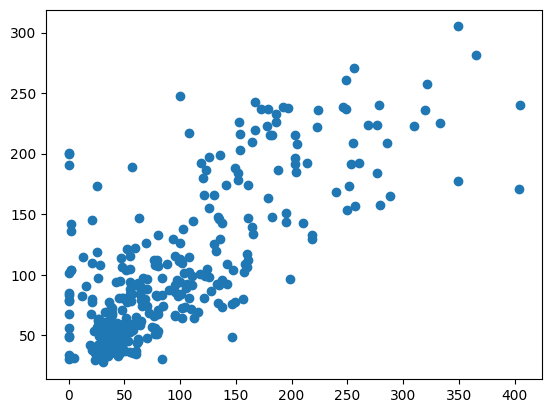

In [46]:
plt.scatter(y_test,prediction)

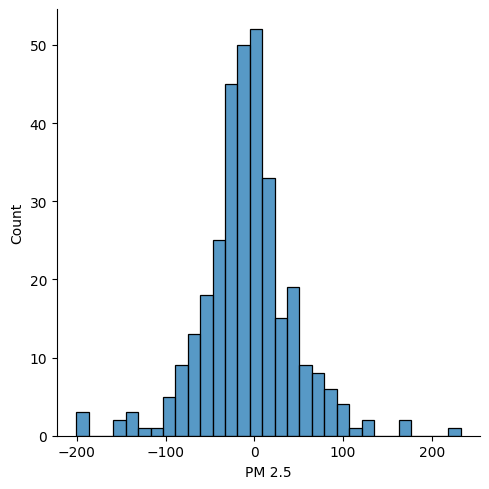

In [47]:
sns.displot(y_test-prediction)

# Hyperparameter Tuning

In [48]:
RandomForestRegressor()

RandomForestRegressor()

In [49]:
## Randomized SearchCV

n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]

max_features=['auto','sqrt']

max_depth=[int(x) for x in np.linspace(5,30,num=6)]

min_samples_split=[2,5,10,15,100]

min_samples_leaf=[1,2,5,10]


In [50]:
#Create Random Grid
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}
print(random_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [51]:
rf=RandomForestRegressor()

In [52]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=100,cv=5,verbose=0,random_state=42)

In [53]:
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [54]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [55]:
rf_random.best_score_

-2676.150258777042

In [56]:
predictions=rf_random.predict(X_test)

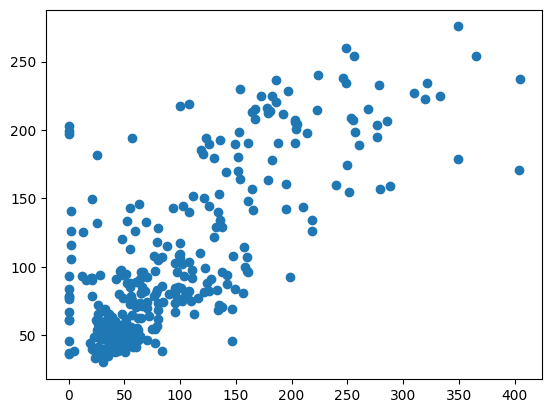

In [57]:
plt.scatter(y_test,predictions)

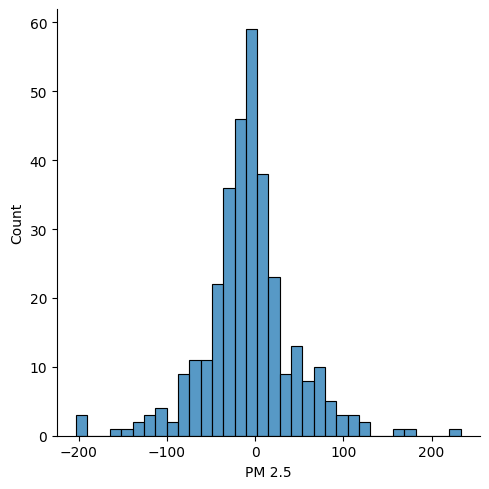

In [58]:
sns.displot(y_test-predictions)

# Random Forest Regression Score

In [59]:

print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 37.09514973982122
MSE: 2808.829484130281
RMSE: 52.9983913353064


# XGBoost Regressor 

In [60]:

regressor=xgb.XGBRegressor()
regressor.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [61]:
print('Coefficient of determination R^2 <--- on train set:{}'.format(regressor.score(X_train,y_train)))

Coefficient of determination R^2 <--- on train set:0.9991328503588336


In [62]:
print('Coefficient of determination R^2 <--- on test set:{}'.format(regressor.score(X_test,y_test)))

Coefficient of determination R^2 <--- on test set:0.5152179613603001


In [63]:

score=cross_val_score(regressor,X_train,y_train,cv=5)
score

array([0.56951992, 0.60955933, 0.58431506, 0.49323336, 0.40406652])

In [64]:
score.mean()

0.532138837923256

### Model Evaluation

In [65]:
prediction=regressor.predict(X_test)

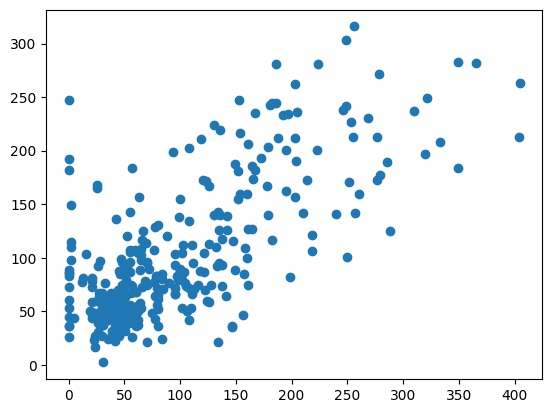

In [66]:
plt.scatter(y_test,prediction)

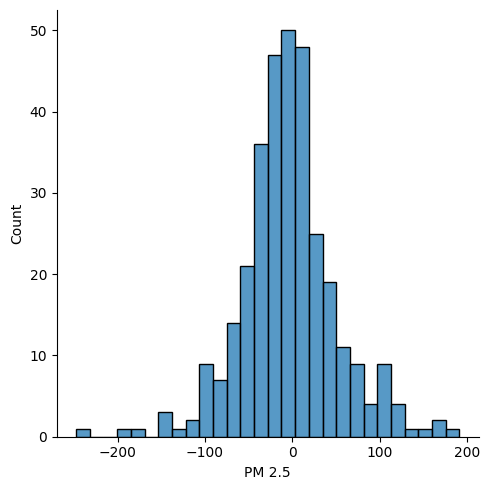

In [67]:
sns.displot(y_test-prediction)

# Hyperparameter Tuning

In [68]:
xgb.XGBRegressor()

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [69]:
#Randomized Search CV
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
learning_rate=['0.05','0.1','0.2','0.3','0.5','0.6']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
subsample=[0.7,0.6,0.8]
min_child_weight=[3,4,5,6,7]

In [70]:
random_grid={'n_estimators':n_estimators,
             'learning_rate':learning_rate,
             'max_depth':max_depth,
             'subsample':subsample,
             'min_child_weight':min_child_weight}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [71]:
regressor=xgb.XGBRegressor()

In [72]:
xg_random=RandomizedSearchCV(estimator=regressor,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=100,verbose=0,random_state=42,n_jobs=1)

In [73]:
xg_random.fit(X_train,y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=100, n_jobs=1,
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_child_weight': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200],
                                        'subsample': [0.7, 0.6, 0.8]},
                   random_state=42, scoring='neg_mean_squared_error')

In [74]:
xg_random.best_params_

{'subsample': 0.6,
 'n_estimators': 100,
 'min_child_weight': 6,
 'max_depth': 15,
 'learning_rate': '0.05'}

In [75]:
xg_random.best_score_

-2867.9224567285614

In [76]:
predictions=xg_random.predict(X_test)

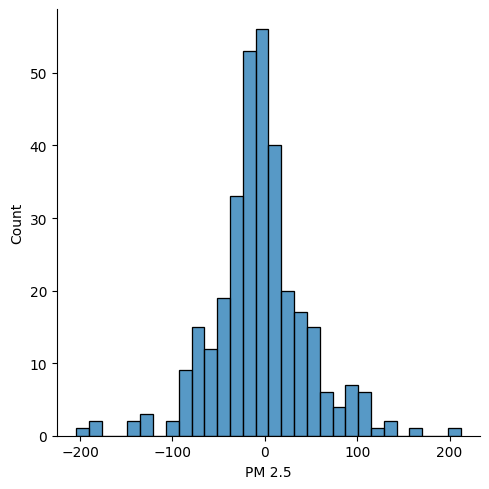

In [77]:
sns.displot(y_test-predictions)

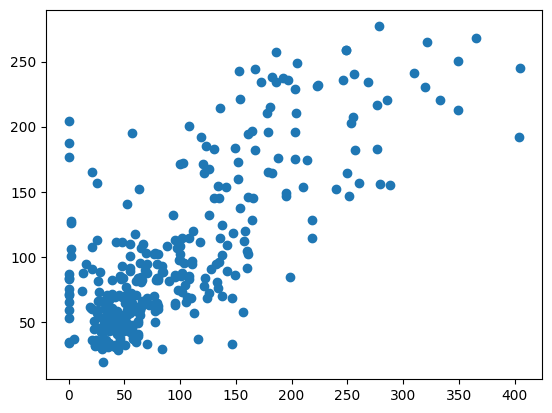

In [78]:
plt.scatter(y_test,predictions)

# XGBoost Regression Score

In [79]:

print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 37.073663316079234
MSE: 2690.779159763467
RMSE: 51.872720766925916


# Decision Tree Regressor

In [80]:

dtree=DecisionTreeRegressor(criterion='squared_error')

In [81]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [82]:
print('Coefficient of determination R^2 <--- on train set:{}'.format(dtree.score(X_train,y_train)))

Coefficient of determination R^2 <--- on train set:1.0


In [83]:
print('Coefficient of determination R^2 <--- on test set:{}'.format(dtree.score(X_test,y_test)))

Coefficient of determination R^2 <--- on test set:0.1910717225996098


In [84]:

score=cross_val_score(dtree,X_train,y_train,cv=5)
score

array([0.26355727, 0.37598873, 0.23296969, 0.22854739, 0.04958566])

In [85]:
score.mean()

0.23012975087060425